In [1]:
%matplotlib inline

import numpy  as np
import pandas as pd
import os, sys

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('poster')

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

basepath = os.path.expanduser('~/Desktop/src/AllState_Claims_Severity/')
sys.path.append(os.path.join(basepath, 'src'))

np.random.seed(2016)

In [2]:
train      = pd.read_csv(os.path.join(basepath, 'data/raw/train.csv'))
test       = pd.read_csv(os.path.join(basepath, 'data/raw/test.csv'))
sample_sub = pd.read_csv(os.path.join(basepath, 'data/raw/sample_submission.csv'))

In [3]:
# encode categorical variables

def encode_categorical_features(train, test):
    columns = train.select_dtypes(include=['object']).columns
    
    for col in columns:
        lbl = LabelEncoder()
        lbl.fit(pd.concat((train[col], test[col])))
        
        train[col] = lbl.transform(train[col])
        test[col]  = lbl.transform(test[col])
        
    return train, test

train, test = encode_categorical_features(train, test)

In [4]:
X = train[train.columns[1:-1]]
y = train.loss

Feature ranking:
1. feature 79 (0.140060)
2. feature 78 (0.125366)
3. feature 56 (0.050179)
4. feature 117 (0.039715)
5. feature 122 (0.039029)
6. feature 11 (0.036878)
7. feature 80 (0.022465)
8. feature 127 (0.017330)
9. feature 129 (0.016716)
10. feature 126 (0.015399)
11. feature 104 (0.014170)
12. feature 99 (0.013813)
13. feature 71 (0.013157)
14. feature 111 (0.012556)
15. feature 105 (0.011788)
16. feature 118 (0.011213)
17. feature 120 (0.010532)
18. feature 100 (0.010263)
19. feature 109 (0.010002)
20. feature 0 (0.009871)
21. feature 93 (0.009840)
22. feature 119 (0.009544)
23. feature 123 (0.009135)
24. feature 121 (0.008948)
25. feature 86 (0.008862)
26. feature 112 (0.008807)
27. feature 125 (0.008467)
28. feature 115 (0.008356)
29. feature 82 (0.008105)
30. feature 92 (0.007514)
31. feature 52 (0.007507)
32. feature 90 (0.007487)
33. feature 81 (0.007403)
34. feature 114 (0.007387)
35. feature 116 (0.007142)
36. feature 124 (0.007011)
37. feature 110 (0.006822)
38. featu

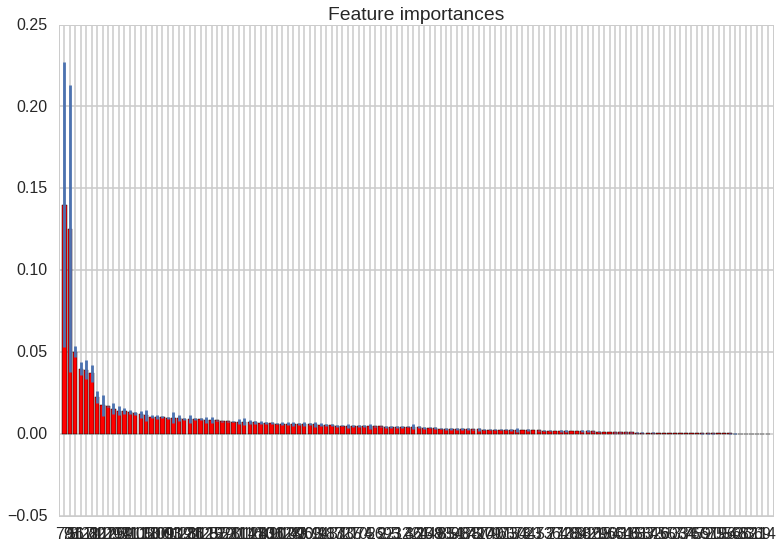

In [5]:
# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators=10,
                              random_state=0, n_jobs=-1)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()